Simple script to plot luminosity vs temperature of the stellar models distributed by Robitaille 2017.
See https://zenodo.org/record/166732#.W3smGnUrJTI

In [1]:
from astropy.table import Table
from sedfitter.sed import SEDCube
import numpy as np
from astropy.io import ascii
from astropy.table import Table,Column
from astropy import units as u
from astropy.visualization import quantity_support
from astropy.constants import L_sun, M_sun, R_sun,sigma_sb
from math import pi
quantity_support()
%matplotlib inline
import matplotlib.ticker
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8.8,6.8]


Read in the parameters file for model set that contains only the stellar profiles. 

In [2]:
t = Table.read('/lupus3/mpound/filter_convolve/models_r17/s---s-i/parameters.fits')

Compute a luminosity column.  $L = 4 \pi \sigma R^2 T^4$

In [3]:
t['star.R'] = t['star.radius']*R_sun 
t['star.radius'].unit='Rsun'
t['star.luminosity'] = 4.0*pi*sigma_sb*(t['star.R']**2)*(t['star.temperature']**4)
t['star.Lsun'] = t['star.luminosity']/L_sun
t['star.luminosity'].unit = 'W'
t['star.luminosity'].format='4.3E'
t['star.radius'].format='4.3E'
t['star.R'].format='4.3E'
t['star.R'].unit='m'
t['star.Lsun'].unit='Lsun'
t['star.Lsun'].format='5.3f'
t['star.Lsun'].format='5.3f'
t[:10]

MODEL_NAME,star.radius,star.temperature,scattering,inclination,star.R,star.luminosity,star.Lsun
,solRad,,,,m,W,solLum
bytes20,float64,float64,int64,float64,float64,float64,float64
01QyhoBc_01,2.728E-01,4888.0,1,45.0,1.898E+08,1.465E+25,0.038
01Xx6elC_01,3.830E-01,12050.0,1,45.0,2.665E+08,1.067E+27,2.786
03ZZRVTe_01,3.122E+01,4967.0,1,45.0,2.172E+10,2.046E+29,534.485
03amqKIp_01,1.381E+01,7891.0,1,45.0,9.608E+09,2.550E+29,666.206
03dloFhH_01,4.463E+01,6450.0,1,45.0,3.105E+10,1.189E+30,3105.888
03jGXYVQ_01,4.797E+00,9889.0,1,45.0,3.337E+09,7.590E+28,198.263
05DVDxNM_01,6.069E-01,4998.0,1,45.0,4.222E+08,7.927E+25,0.207
05qQySTl_01,8.242E+00,7737.0,1,45.0,5.734E+09,8.395E+28,219.305


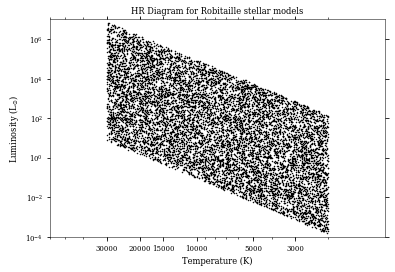

In [4]:
# plot temperature vs luminosity
plt.scatter((t['star.temperature']),(t['star.Lsun']),c='k',s=1)
plt.xlim(1000,60000)
plt.ylim(1E-4,1E7)
plt.xlabel("Temperature (K)")
plt.ylabel("Luminosity (L$_{\odot}$)")
ax = plt.gca()
ax.invert_xaxis()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks([3000,5000,10000,15000,20000,30000])
ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(top=True, which="minor",axis="x")
ax.tick_params(right=True, which="minor",axis="y")
ax.get_xaxis().set_major_formatter(ScalarFormatter())
# From Robitaille 2017: "Castelli & Kurucz (2004) were used, while for temperatures below 4000 K, 
# models computed with the PHOENIX code (Brott & Hauschildt 2005) and intended for the 
# Gaia mission1 were used instead. "
plt.title('HR Diagram for Robitaille stellar models' )
plt.savefig("Robitaille_HRdiagram.png")